In [ ]:
!mkdir data
import gdown 
file_id = "111BpNdhpOOD-qeP2qDbfXT_gIQDH0IZY"
url = f'https://drive.google.com/uc?id={file_id}'
output = 'data/passagers.csv'
gdown.download(url, output, quiet=True)

file_id = "1-Af4BFXIRVZHeVi2QI2RmMJ2V2pU1kKA"
url = f'https://drive.google.com/uc?id={file_id}'
output = 'data/meteo.csv'
gdown.download(url, output, quiet=True)


'data/meteo.csv'

**Imports**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# from dataprep.eda import *
from pandas_profiling import ProfileReport
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py

**Functions**


**Load Data**

In [ ]:
data_path = "data" 
data = pd.read_csv(data_path + "/passagers.csv", parse_dates=['dateTime'])
meteo = pd.read_csv(data_path + "/meteo.csv", sep=";", parse_dates=["DATE"]).rename(columns={"DATE": "dateTime", "OPINION": "opinion"})

In [ ]:
data = data[data.dateTime<"2020-03-08"]
data

,dateTime,passengersNumber,line,lineType
0,2019-05-01,4172.0,5,daily
1,2019-04-06,7330.0,5,daily
2,2019-04-05,10426.0,5,daily
3,2019-04-17,9134.0,5,daily
4,2019-04-21,3608.0,5,daily
...,...,...,...,...
36374,2020-03-06,95.0,B10,night
36375,2019-08-16,466.0,B10,night
36376,2019-09-21,330.0,B10,night
36377,2019-10-04,80.0,B10,night


**Exploraty data Analysis**

In [ ]:
# Dimensions of dataframe
data.shape

(10292, 4)

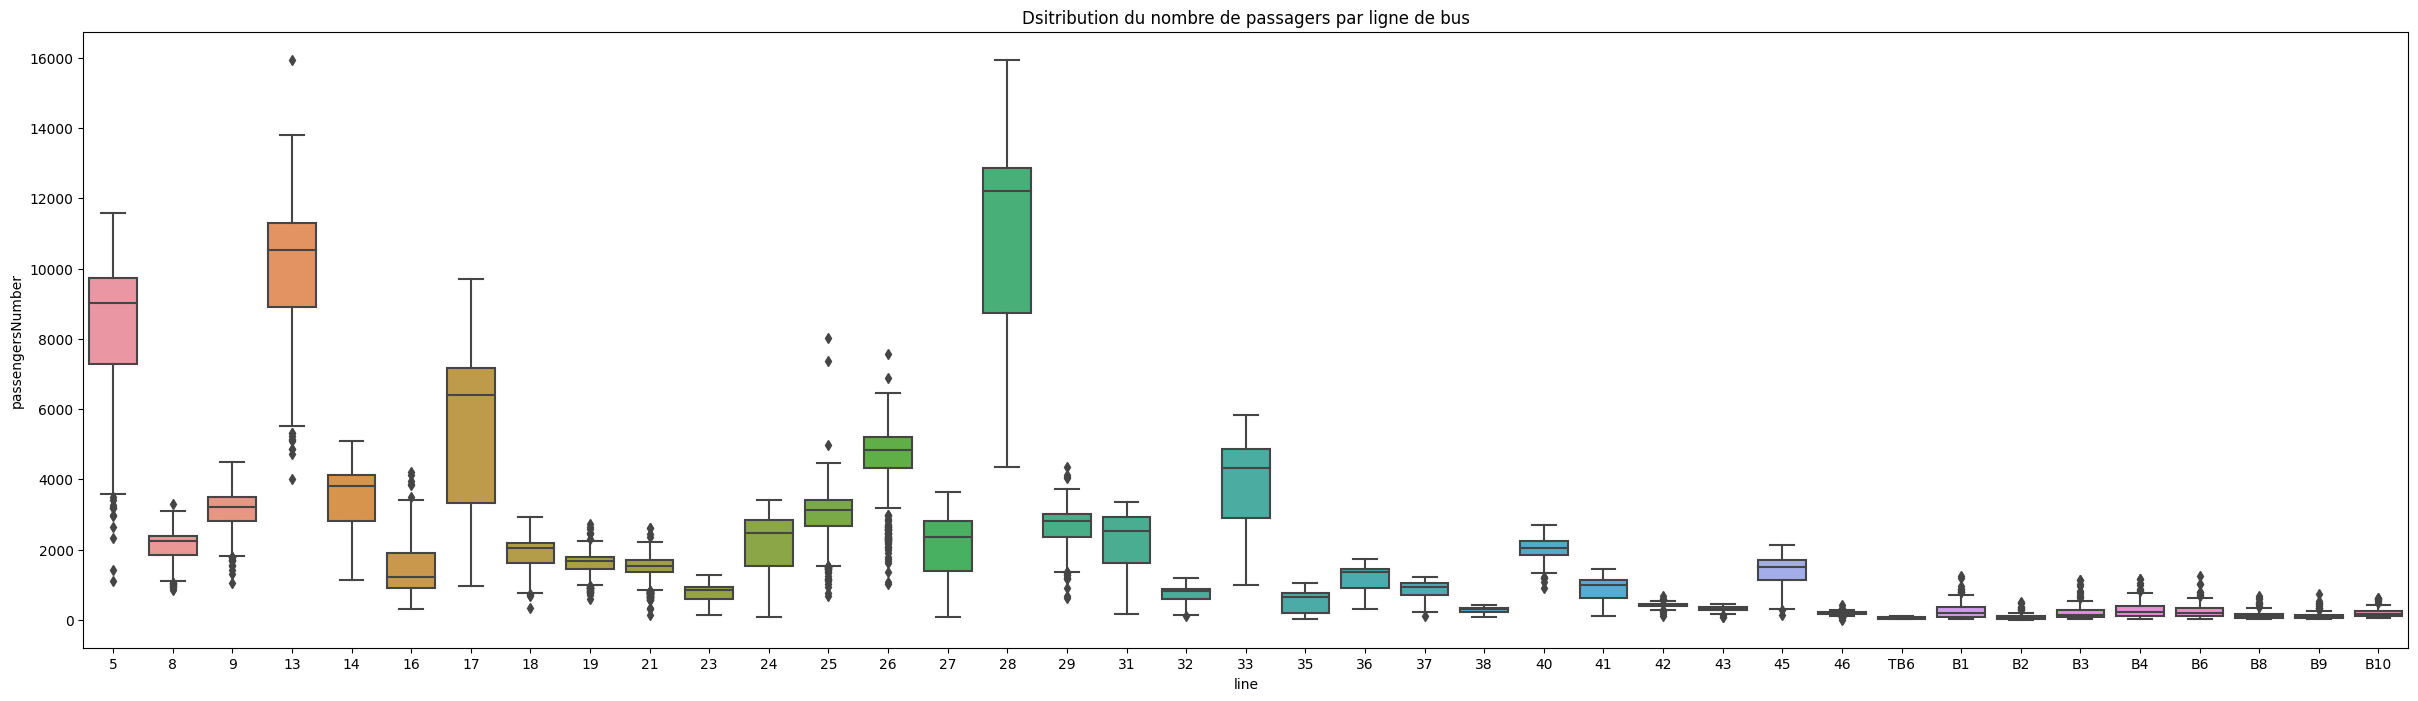

In [ ]:
plt.figure(figsize=(30, 8))
sns.boxplot(x="line", y='passengersNumber', data=data) 
plt.title("Dsitribution du nombre de passagers par ligne de bus")
plt.show()

In [ ]:
# Check if data contains entire duplicated lines
i = 0 
lines = []
for line in data.line.unique() :
  tmp = data[data.line == line].dateTime.duplicated()
  sum = tmp.sum()
  if sum > 0 :
    lines.append(line)
  print(f"Ligne {line} : {sum}")
  i += 1
  if(i == 5) :
    break

Ligne 5 : 2
Ligne 8 : 0
Ligne 9 : 1
Ligne 13 : 1
Ligne 14 : 1


In [ ]:
for l in lines : 
  print(f"Ligne {l}")
  tmp = data[data.line == l]
  mask = tmp.dateTime.duplicated()
  display(tmp[mask])
  print()
  display(tmp[tmp.dateTime.isin(tmp[mask].dateTime)])
  print("\n", '='*20, "\n")

Ligne 5


,dateTime,passengersNumber,line,lineType
62,2019-08-25,4741.0,5,daily
109,2019-11-12,8856.0,5,daily


,dateTime,passengersNumber,line,lineType
61,2019-08-25,4742.0,5,daily
62,2019-08-25,4741.0,5,daily
91,2019-11-12,8945.0,5,daily
109,2019-11-12,8856.0,5,daily




Ligne 9


,dateTime,passengersNumber,line,lineType
2339,2019-11-12,3650.0,9,daily


,dateTime,passengersNumber,line,lineType
2318,2019-11-12,3631.0,9,daily
2339,2019-11-12,3650.0,9,daily




Ligne 13


,dateTime,passengersNumber,line,lineType
3327,2019-09-30,11274.0,13,daily


,dateTime,passengersNumber,line,lineType
3308,2019-09-30,11106.0,13,daily
3327,2019-09-30,11274.0,13,daily




Ligne 14


,dateTime,passengersNumber,line,lineType
4345,2019-08-27,3216.0,14,daily


,dateTime,passengersNumber,line,lineType
4237,2019-08-27,3124.0,14,daily
4345,2019-08-27,3216.0,14,daily


Il existe des doublons des dates pour certaines lignes de bus prises séparement. Nous faisons le choix de conserver que la première valeur à chaque fois et supprimer les autres doublons 

In [ ]:
#Suppression des doublons 
new_df = pd.DataFrame(data={col : [] for col in data.columns})
for line in data.line.unique() :
  busline_df = data[data.line == line]
  mask = busline_df.dateTime.duplicated()
  busline_df = busline_df[~mask]
  new_df = pd.concat([new_df, busline_df], axis=0)

data=new_df
print(data.shape)
display(data)

(10272, 4)


,dateTime,passengersNumber,line,lineType
0,2019-05-01,4172.0,5,daily
1,2019-04-06,7330.0,5,daily
2,2019-04-05,10426.0,5,daily
3,2019-04-17,9134.0,5,daily
4,2019-04-21,3608.0,5,daily
...,...,...,...,...
36374,2020-03-06,95.0,B10,night
36375,2019-08-16,466.0,B10,night
36376,2019-09-21,330.0,B10,night
36377,2019-10-04,80.0,B10,night


In [ ]:
# check missing values
data.isna().any()

dateTime            False
passengersNumber    False
line                False
lineType            False
dtype: bool

Aucune donnée manquante dans les différentes colonnes

In [ ]:
# desciptive stats
data.describe(include="all", datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
dateTime,10272,NaN,NaN,NaN,2019-09-19 08:05:11.214953216,2019-04-05 00:00:00,2019-06-30 00:00:00,2019-09-17 00:00:00,2019-12-12 00:00:00,2020-03-07 00:00:00,NaN
passengersNumber,10272.0,NaN,NaN,NaN,2443.701811,1.0,506.75,1535.0,2994.25,15948.0,2841.572448
line,10272,39,5,317,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lineType,10272,2,daily,9421,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- La ligne de bus 5 est à priori celle qui revient apprait le plus souvent.. idem pour la linetype daily
- à partir de l'écart-type on déduit une grande variation au niveau du nombre de passagers

In [ ]:
# plt.figure(figsize=(25,7))
# plt.subplot(121, title="distribution du nombre de jour de circulation des lignes de bus,")
# sns.countplot(data=data, x="line", hue="lineType") 
# plt.show()

In [ ]:
fig = px.bar(data, x='line', color='lineType', barmode='group')
fig.show()

- La relplot sur les variables line et lineType indique que les bus B (B1, B2, ..., B10) circulent uniquement de nuit tandis que les autres lignes ne circulent que de jour. **On pourrait émettre l'hypothèse selon laquelle les bus de nuit ne roulent qu'à certaines périodes précises**
- Les lignes de bus du jour sont les plus fréquentes

In [ ]:
# data[data.lineType == "night"].resample("3D").plot()
fig = go.Figure()
tmp = data[data.lineType == "night"].set_index("dateTime")
for line in tmp.line.unique() :
  data_resample = tmp[tmp.line == line].resample('1D').mean() 

  # Create a Plotly figure with a line trace
  fig.add_trace(go.Scatter(x=data_resample.index, y=data_resample['passengersNumber'], mode='lines', name="line " + line))

# Customize the plot layout
fig.update_layout(title='Number of passengers by day (lineType = daily)', xaxis_title='Day', yaxis_title='# of passengers')

# Show the plot
fig.show()

Nous pouvons constater que ces bus sont en service le plus souvent en fin de semaine vendredi et dimanche. Notons quand même qu'il y a des fois exceptionnelles où ils ont été mis en service depuis le mercredi jusqu'au dimanche de certaines semaines et même durant toute une semaine

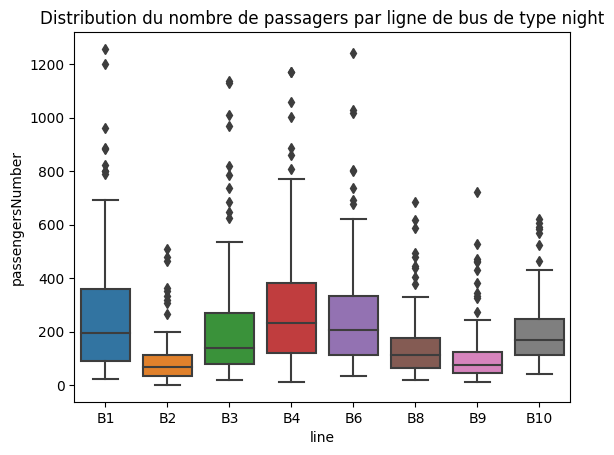

In [ ]:
sns.boxplot(data=tmp, x="line", y="passengersNumber")
plt.title("Distribution du nombre de passagers par ligne de bus de type night")
plt.show()

[]

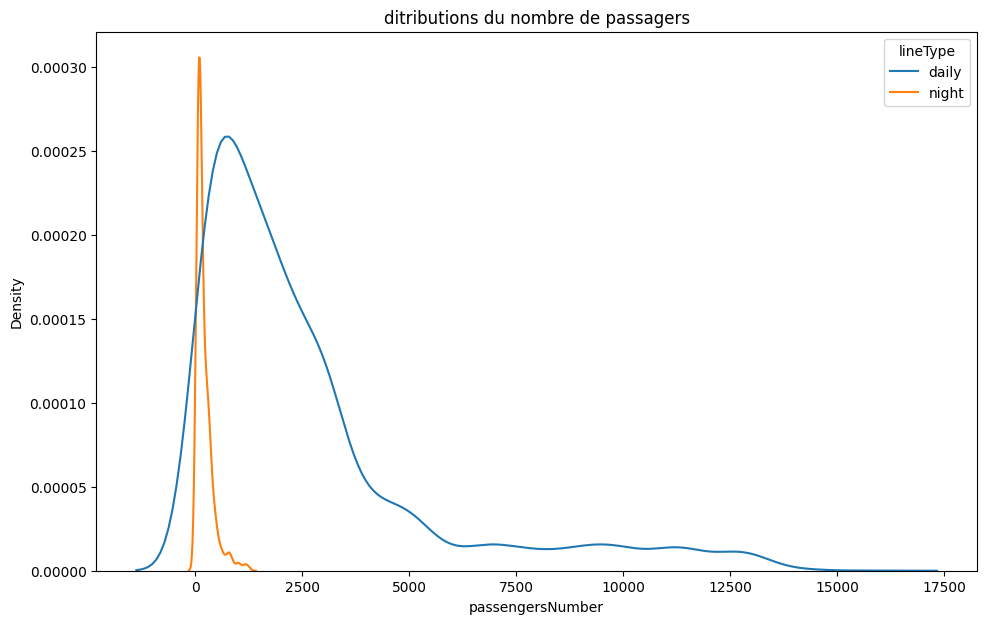

In [ ]:
plt.figure(figsize=(25,7))
plt.subplot(121, title="ditributions du nombre de passagers") 
sns.kdeplot(data=data, x="passengersNumber", hue="lineType")
# plt.subplot(122, title='2')
# sns.kdeplot(data=data, x="passengersNumber", hue="line")
plt.plot()

- Globalement, les bus de nuit semblent très peu fréquentées car ils sont peu en service.

[]

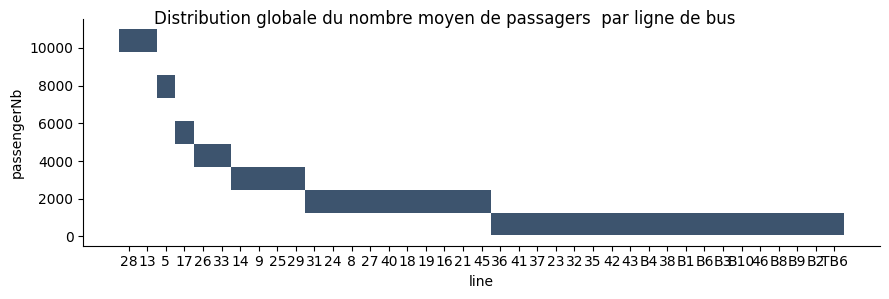

In [ ]:
tmp = data.groupby(['line']).agg(passengerNb = ('passengersNumber', np.mean)).sort_values('passengerNb', ascending=False)
f = sns.displot(data=tmp, x="line", y="passengerNb", aspect=3, height=3)
f.fig.suptitle('Distribution globale du nombre moyen de passagers  par ligne de bus')
plt.plot()

- Les lignes de bus les plus fréquentes sont les 28 et 13

**Analyse temporelle - ajout de nouvelles variables basées sur la date**

In [ ]:
#sort data by dateTime column 
data.sort_values(by="dateTime", inplace=True)

# set datetime as index 
ts = data.set_index('dateTime', drop=False)

# add day of week as new column 
ts = ts.assign(dayofweek = ts.index.day_name() )

# add day of month as new column 
ts = ts.assign(dayofmonth = ts.index.day) 

# add column is_we as new boolean columnthat indicates if it's weekend or no
ts = ts.assign(is_we=ts.dayofweek.isin(['Sunday', 'Saturday']))

# add month column 
ts = ts.assign(month = ts.index.month_name() )

month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'November', 'December']
day_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [ ]:
print(ts.shape)
display(ts.head())

(10272, 8)


,dateTime,passengersNumber,line,lineType,dayofweek,dayofmonth,is_we,month
dateTime,,,,,,,,
2019-04-05,2019-04-05,2392.0,8,daily,Friday,5,False,April
2019-04-05,2019-04-05,25.0,B2,night,Friday,5,False,April
2019-04-05,2019-04-05,5295.0,26,daily,Friday,5,False,April
2019-04-05,2019-04-05,2065.0,40,daily,Friday,5,False,April
2019-04-05,2019-04-05,3032.0,29,daily,Friday,5,False,April


<Figure size 1500x700 with 0 Axes>

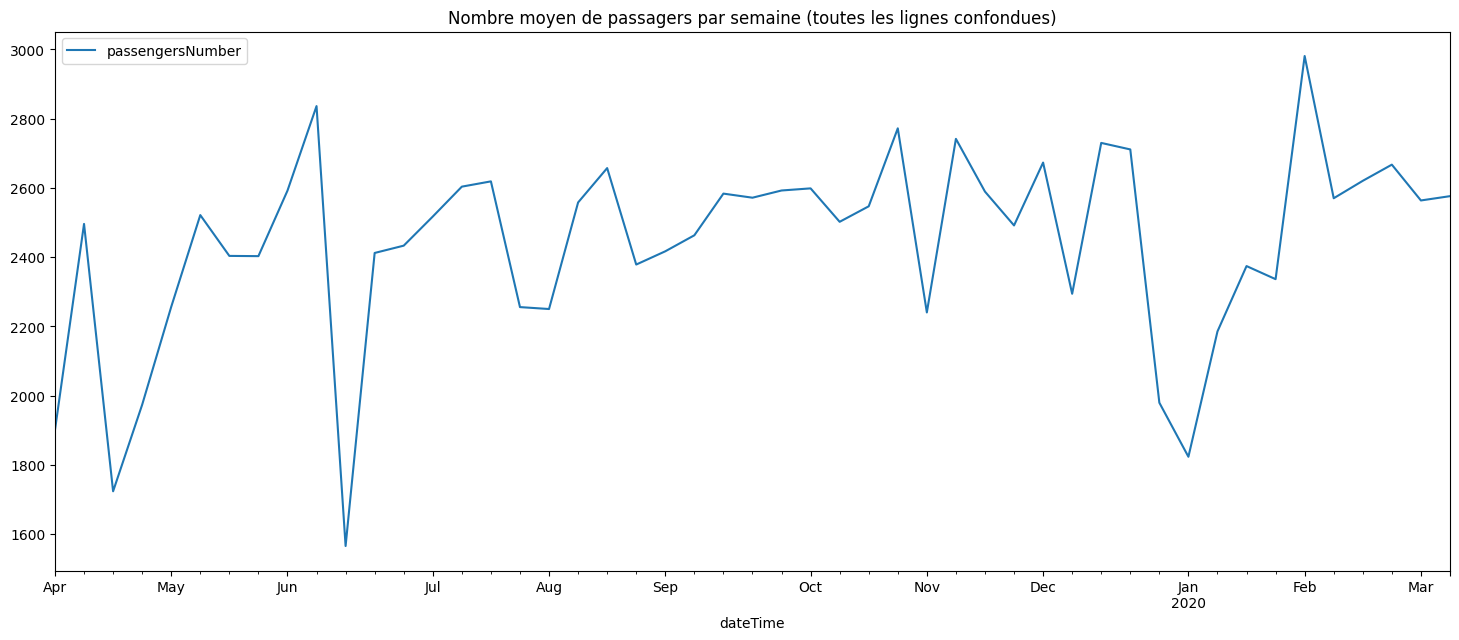

In [ ]:
cols = ['passengersNumber']
plt.figure(figsize=(15, 7)) 
ts[cols].resample("W").mean().plot(title="Nombre moyen de passagers par semaine (toutes les lignes confondues)", figsize=(18, 7), kind="line")
plt.show()

On note une grande variation des valeurs d'une semaine à l'autre. 

In [ ]:
data_weekly = ts.resample('D').sum()
data_daily = ts.resample("3D").sum()

# Create a Plotly figure with a line trace
fig = go.Figure()
weekly = go.Scatter(x=data_weekly.index, y=data_weekly['passengersNumber'], mode='lines',name="weekly")
daily = go.Scatter(x=data_daily.index, y=data_daily['passengersNumber'], mode='lines',name="daily")

# Create layout
layout = go.Layout(
    title='Total de passagers par jour et par semaine (toutes lignes de bus confondues) ',
    xaxis=dict(title='Dates'),
    yaxis=dict(title='Nombre de passagers')
)

# Create figure
fig = go.Figure(data=[daily, weekly], layout=layout)

# Show figure
fig.show()

On note d'après le graphique ci-dessus que le nombre de passagers est à 0 pour certains jours. Ce qui suppose qu'aucun bus ne fut en cirulation ces jours-là : 
- 09 avril 2019 : 
- 08 au 15 juin 2019 : 
- 05 juillet 2019 : 
- 24 septembre :
- 26 au 28 septembre 2019 :
- 27 octobre 2019 :
- 29 janvier au 03 février 2020 :

In [ ]:
# mask = ( (ts.dateTime == "2019-04-09") | (ts.dateTime.isin(["2019-06-08"])) | (ts.dateTime == "2019-07-05") | (ts.dateTime == "2019-09-24") | (ts.dateTime.isin(["2019-09-26", "2019-06-28"])) | (ts.dateTime == "2019-10-27") | (ts.dateTime.isin(["2020-01-29", "2020-02-03"])) )
# ts[mask]

In [ ]:
fig = go.Figure()

for line in ts.line.unique() :
  data_resample = ts[ts.line == line].resample('3D').mean() 

  # Create a Plotly figure with a line trace
  fig.add_trace(go.Scatter(x=data_resample.index, y=data_resample['passengersNumber'], mode='lines', name="line " + line))

# Customize the plot layout
fig.update_layout(title='Sum on 3 consecutives Days - Total passengers (hue by bus lines)', xaxis_title='each 3 days', yaxis_title='# of passengers')

# Show the plot
fig.show()

Ce graphique vient confirmer notre analyse du graphique précédent.
Notons aussi cette affluence particulièrement plus élevée autour du 12 août 2019.

In [ ]:
#box plot
# plt.figure(figsize=(30, 8))
# sns.boxplot(x="month", y='passengersNumber', hue="dayofweek", data=ts, hue_order=day_list, order=month_list)
# plt.legend(loc="upper right")
# plt.title("Boxplot du nombre de passagers par mois distinguéé par jour de la semaine")
# plt.show()

# On note de nombreux outliers dans les données. Cela pourrait s'expliquer par certains évènemets particuliers. Il serait donc intéressant de rajouter dans la suite une variable décrivant des évènements qui auraient influencer l'affluence des passagers.

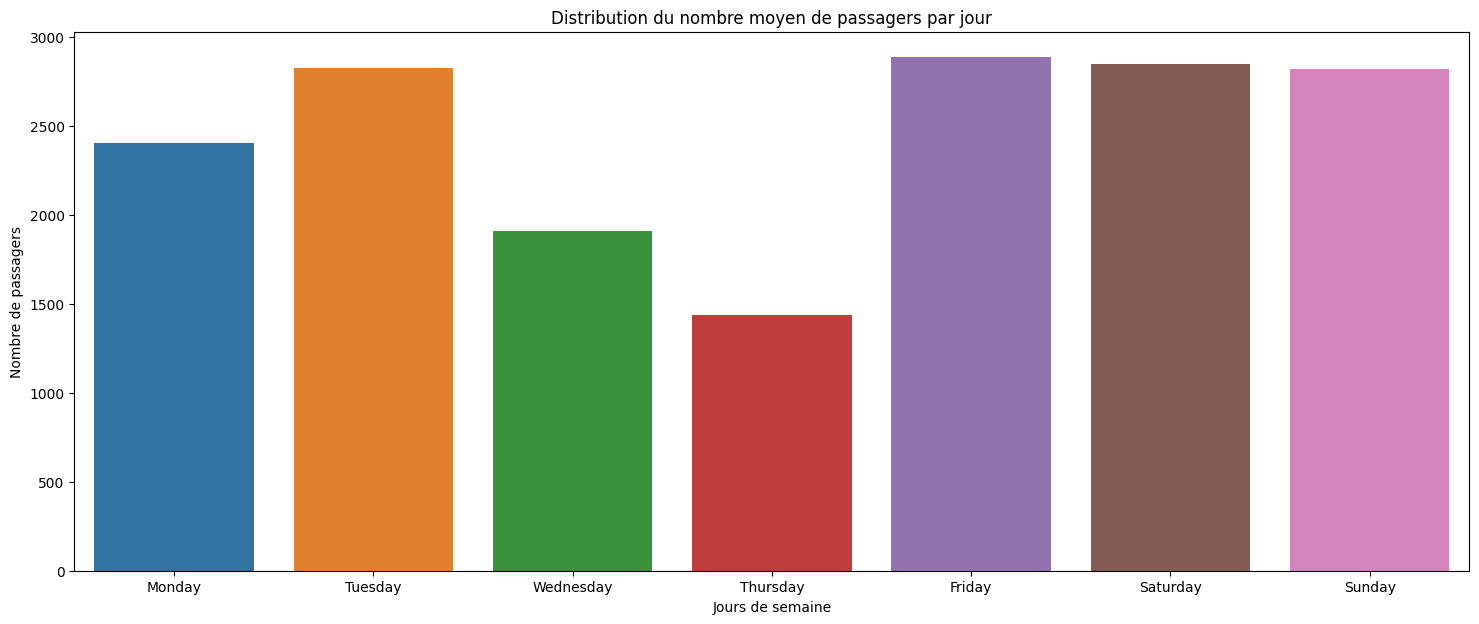

In [ ]:
cols = ['dayofweek', 'passengersNumber']
tmp = ts[cols].groupby(['dayofweek']).mean() 
plt.figure(figsize=(18, 7))
sns.barplot(data=tmp, x=day_list, y='passengersNumber')
plt.title("Distribution du nombre moyen de passagers par jour")
plt.xlabel("Jours de semaine")
plt.ylabel("Nombre de passagers")
plt.show()

- On note une très forte affluence en fin de semaine et les mardi
- A contrario les jeudi, l'affluence est moindre (environ la moitié des jours de week-end)

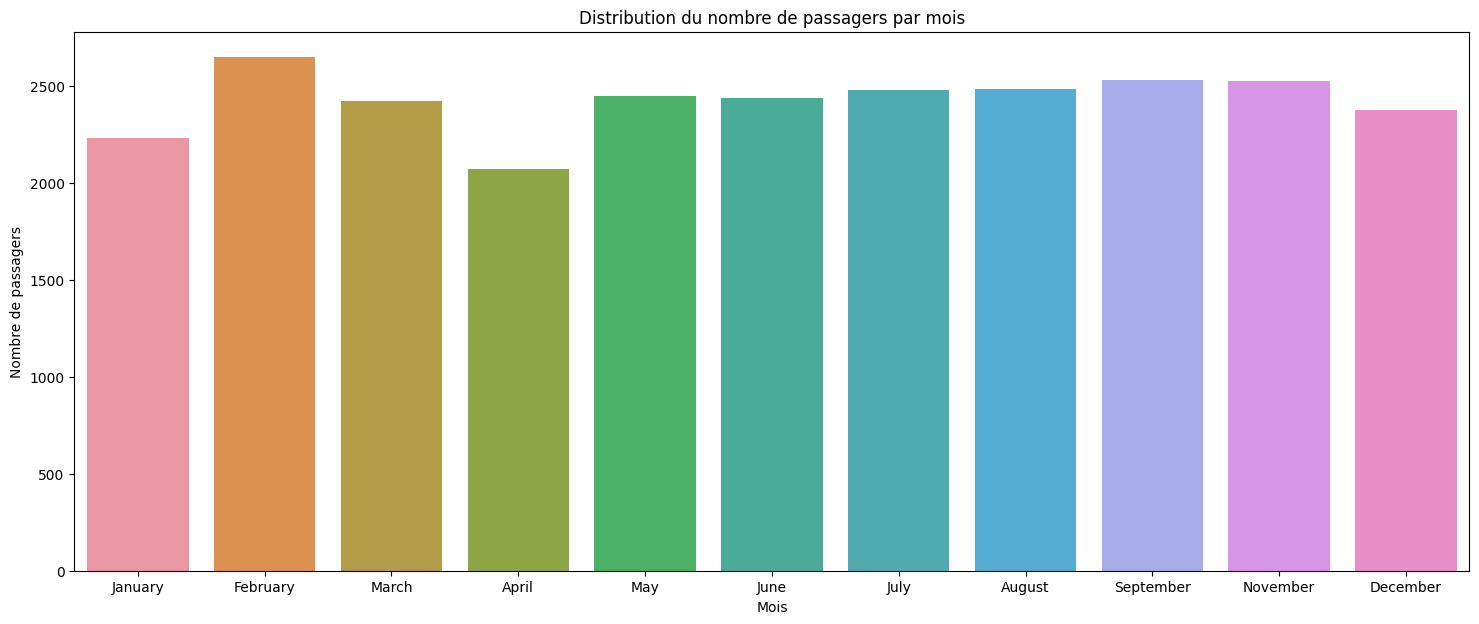

In [ ]:
cols = ['month', 'passengersNumber']
tmp = ts[cols].groupby(['month']).mean()
plt.figure(figsize=(18, 7))
sns.barplot(x=tmp.index, y="passengersNumber", data=tmp, order=month_list)
plt.title("Distribution du nombre de passagers par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre de passagers")
plt.show()

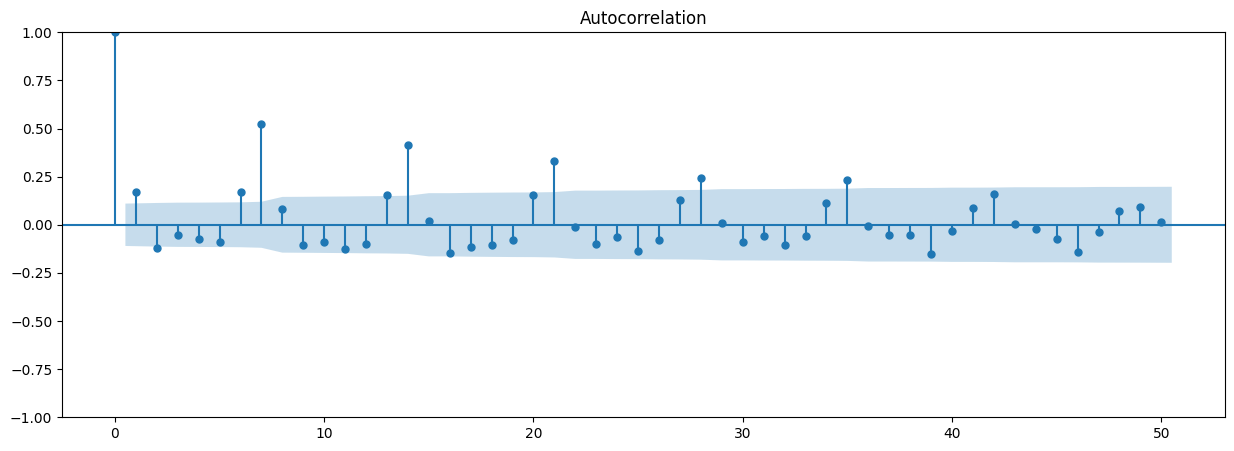

<Figure size 2000x800 with 0 Axes>

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
f, ax = plt.subplots(figsize=(15, 5))
plot_acf(ts[ts.line=="5"]['passengersNumber'], lags=50, ax=ax)
plt.figure(figsize=(20,8)) 
plt.show()

Le graphique ci-dessus fait ressorti une certaine saisonnailté hebdomaire au nivaeu de l'évolution du nombre de passagers. Il existe une corrélation entre les valeurs d'un jour donné et et les valeurs d'il y a 1 et 2 semaines. Sur cette base, nous choisissons d'ajouter cette information supplémentaire dans le jeu de données.

**Add more Features**

In [ ]:
ts.shape

"""
National : 
    1er janvier : Nouvel An;
    19 avril: Vendredi Saint;
    1er mai: Fête du Travail;
    15 août: Assumtion de la vierge;
    12 octobre: Fête nationale espagnole;
    1er novembre: Tous les Saints;
    6 décembre: jour de la Constitution espagnole;
    25 décembre : Nativité du Seigneur
Pays basque :
    19 mars, San Jose;
    18 avril, Jeudi Saint;
    22 avril, lundi de Pâques;
    25 juillet, Saint-Jacques-Apôtre.
"""

'\nNational : \n    1er janvier : Nouvel An;\n    19 avril: Vendredi Saint;\n    1er mai: Fête du Travail;\n    15 août: Assumtion de la vierge;\n    12 octobre: Fête nationale espagnole;\n    1er novembre: Tous les Saints;\n    6 décembre: jour de la Constitution espagnole;\n    25 décembre : Nativité du Seigneur\nPays basque :\n    19 mars, San Jose;\n    18 avril, Jeudi Saint;\n    22 avril, lundi de Pâques;\n    25 juillet, Saint-Jacques-Apôtre.\n'

In [ ]:
# Ajout d'une varibale meteo 
tmp = ts.reset_index(drop=True).merge(meteo, how='left', on="dateTime").rename(columns={"opinion":"meteo"}).set_index('dateTime', drop=False)

#Ajout d'une variable vacances 
mask = ( (ts.index.isin(pd.date_range(start="2019-12-21", end="2020-01-05"))) | 
        (ts.index.isin(pd.date_range(start="2019-04-01", end="2019-04-10"))) | 
        (ts.index.isin(pd.date_range(start="2019-06-21", end="2019-09-15"))) )
ts_aug = tmp.assign(is_hollidays=np.where(mask, "1", "0"))

In [ ]:
print("shape => ", ts_aug.shape)
display(ts_aug.head())

shape =>  (10272, 10)


,dateTime,passengersNumber,line,lineType,dayofweek,dayofmonth,is_we,month,meteo,is_hollidays
dateTime,,,,,,,,,,
2019-04-05,2019-04-05,2392.0,8,daily,Friday,5,False,April,meteo defavorable,1
2019-04-05,2019-04-05,25.0,B2,night,Friday,5,False,April,meteo defavorable,1
2019-04-05,2019-04-05,5295.0,26,daily,Friday,5,False,April,meteo defavorable,1
2019-04-05,2019-04-05,2065.0,40,daily,Friday,5,False,April,meteo defavorable,1
2019-04-05,2019-04-05,3032.0,29,daily,Friday,5,False,April,meteo defavorable,1


In [ ]:
# Add number of passengers of previous week for each bus line
def previous_week__lambda(x):
  prev_week_date = (x.dateTime - pd.offsets.Day(7)).date().strftime("%Y-%m-%d")
  if ts.dateTime.isin([prev_week_date]).any() :
    tmp = ts.reset_index(drop=True)
    tmp = tmp[tmp.dateTime == prev_week_date] 
    return tmp[tmp.line == x.line].passengersNumber.values if tmp[tmp.line == x.line].passengersNumber.values is not None else np.nan
  return np.nan

ts_aug = ts_aug.assign(prev_week_passengers = ts.apply(previous_week__lambda, axis=1).str[0] )

In [ ]:
ts_aug

,dateTime,passengersNumber,line,lineType,dayofweek,dayofmonth,is_we,month,meteo,is_hollidays,prev_week_passengers
dateTime,,,,,,,,,,,
2019-04-05,2019-04-05,2392.0,8,daily,Friday,5,False,April,meteo defavorable,1,NaN
2019-04-05,2019-04-05,25.0,B2,night,Friday,5,False,April,meteo defavorable,1,NaN
2019-04-05,2019-04-05,5295.0,26,daily,Friday,5,False,April,meteo defavorable,1,NaN
2019-04-05,2019-04-05,2065.0,40,daily,Friday,5,False,April,meteo defavorable,1,NaN
2019-04-05,2019-04-05,3032.0,29,daily,Friday,5,False,April,meteo defavorable,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-07,2020-03-07,3266.0,17,daily,Saturday,7,True,March,meteo correcte,0,3695.0
2020-03-07,2020-03-07,141.0,B8,night,Saturday,7,True,March,meteo correcte,0,106.0
2020-03-07,2020-03-07,168.0,35,daily,Saturday,7,True,March,meteo correcte,0,220.0


In [ ]:
# Impute missing values with median by bus line in prev_week_passengers column
def impute_median (df, impute_col, filter_col):
    for g in df[filter_col].unique():
        df.loc[(df[filter_col] == g) & (df[impute_col].isnull()), impute_col] = np.floor( np.mean(df[impute_col][df[filter_col] == g]) )

impute_median(ts_aug, "prev_week_passengers", "line")

In [ ]:
ts_aug

,dateTime,passengersNumber,line,lineType,dayofweek,dayofmonth,is_we,month,meteo,is_hollidays,prev_week_passengers
dateTime,,,,,,,,,,,
2019-04-05,2019-04-05,2392.0,8,daily,Friday,5,False,April,meteo defavorable,1,2083.0
2019-04-05,2019-04-05,25.0,B2,night,Friday,5,False,April,meteo defavorable,1,92.0
2019-04-05,2019-04-05,5295.0,26,daily,Friday,5,False,April,meteo defavorable,1,4522.0
2019-04-05,2019-04-05,2065.0,40,daily,Friday,5,False,April,meteo defavorable,1,1998.0
2019-04-05,2019-04-05,3032.0,29,daily,Friday,5,False,April,meteo defavorable,1,2619.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-07,2020-03-07,3266.0,17,daily,Saturday,7,True,March,meteo correcte,0,3695.0
2020-03-07,2020-03-07,141.0,B8,night,Saturday,7,True,March,meteo correcte,0,106.0
2020-03-07,2020-03-07,168.0,35,daily,Saturday,7,True,March,meteo correcte,0,220.0


In [ ]:
ts_aug[ts_aug.line == '5']

,dateTime,passengersNumber,line,lineType,dayofweek,dayofmonth,is_we,month,meteo,is_hollidays,prev_week_passengers
dateTime,,,,,,,,,,,
2019-04-05,2019-04-05,10426.0,5,daily,Friday,5,False,April,meteo defavorable,1,8209.0
2019-04-06,2019-04-06,7330.0,5,daily,Saturday,6,True,April,meteo favorable,1,8209.0
2019-04-07,2019-04-07,3179.0,5,daily,Sunday,7,True,April,meteo ideale,1,8209.0
2019-04-08,2019-04-08,9618.0,5,daily,Monday,8,False,April,meteo correcte,1,8209.0
2019-04-10,2019-04-10,9974.0,5,daily,Wednesday,10,False,April,meteo defavorable,1,8209.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-03,2020-03-03,9729.0,5,daily,Tuesday,3,False,March,meteo defavorable,0,9036.0
2020-03-04,2020-03-04,9048.0,5,daily,Wednesday,4,False,March,meteo defavorable,0,10055.0
2020-03-05,2020-03-05,6897.0,5,daily,Thursday,5,False,March,meteo favorable,0,10117.0


**Model building**

In [ ]:
import tensorflow as tf
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from datetime import datetime, timedelta

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [ ]:
class RNN :
  def __init__(self, train_data, val_data, num_cols, cat_cols, target_col="passengersNumber", past_history=15):
    self.target_col = target_col
    self.num_cols, self.cat_cols = num_cols, cat_cols
    self.train_data = train_data
    self.val_data = val_data 

    self.ohe = OneHotEncoder(drop='if_binary')
    self.target_scaler = StandardScaler()
    self.num_cols_scaler = StandardScaler()

    #how many days steps (days) back we will take a look at
    self.past_history = past_history
    # how many days in the future we will predict
    self.future_target = 3

    self.X_train, self.y_train, self.X_val, self.y_val = None, None, None, None
    self.model = None
    self.history = None


  def initialize(self):
    # Fit transformers : scaler and onehotencoder
    self.fit_transformers(self.train_data)
    #  Transform data thanks to transformers
    self.train_data = self.transform_data(self.train_data)
    self.val_data = self.transform_data(self.val_data)
    # Re-organize data to get a structure adapted to RNN
    self.X_train, self.y_train = self.prepare_data_for_network(self.train_data.to_numpy(), self.train_data[target_col], self.past_history, self.future_target, single_step=False)
    self.X_val, self.y_val = self.prepare_data_for_network(self.val_data.to_numpy(), self.val_data[target_col], self.past_history, self.future_target, single_step=False)
    #we will have, (datapoints, time steps history, features) and we are going to predict exactly the same number of training examples
    print("train data shape : ", self.X_train.shape, self.y_train.shape)
    print("val data shape : ", self.X_val.shape, self.y_val.shape)

    return self.X_train, self.y_train, self.X_val, self.y_val

  def fit_model(self, model=None, epochs=100, batch_size=7, callbacks=[]) :
    #Fit model 
    print("Fitting...")
    self.history = model.fit(
      self.X_train, self.y_train, 
      validation_data = (self.X_val, self.y_val),
      #epochs is that the data in the training will be seen n times by our model, use n times in our model 
      #(with few epochs we can get good results, we can check the loss error change to see when it stops improving )
      epochs=epochs, 
      # steps_per_epoch=5,
      # validation_steps=5, 
      #batch the number of subsamples that the model will take when training from a single step
      batch_size=batch_size, 
      #take some of the training data for the validation of our model, (percentage of data we will reserve)
      # validation_split=0.1,
      #we dont want to shuffle as it is a time series data
      shuffle=False,     
      callbacks=callbacks,
      use_multiprocessing = True,
      verbose=0, 
      # workers=10
    )
    self.model = model
    print('Model is fitted')
    
    return self.history, model
    
  def fit_transformers(self, X):
    self.target_scaler = self.target_scaler.fit(X[self.target_col])
    self.num_cols_scaler = self.num_cols_scaler.fit(X[self.num_cols])
    self.ohe = self.ohe.fit(X[self.cat_cols]) 
    return self.target_scaler, self.num_cols_scaler, self.ohe
  
  def transform_data(self, X): 
    tmp1 = tmp1 = pd.DataFrame(data=self.target_scaler.transform(X[self.target_col]), columns=self.target_scaler.get_feature_names_out(), index=X.index) #scale target variable and put in dataframe
    tmp2 = pd.DataFrame(data=self.num_cols_scaler.transform(X[self.num_cols]), columns=self.num_cols_scaler.get_feature_names_out(), index=X.index) #scale feature variables and put in dataframe
    tmp3 = pd.DataFrame(data=self.ohe.transform(X[self.cat_cols]).toarray(), columns=self.ohe.get_feature_names_out(), index=X.index) #scale feature variables and put in dataframe
    return pd.concat([tmp1, tmp2, tmp3], axis=1)

  def prepare_data_for_network(self, X, y, history_size=7, target_size=3, single_step=True):
    data = []
    labels = []

    for i in range(len(X) - target_size): 
        indices = range(i-history_size, i)
        data.append(X[indices]) # get features on "history_size" days interval

        if single_step:
            labels.append(y[i+target_size]) # get targets on "target_size" days interval
        else:
            labels.append(y[i:i+target_size])

    return np.array(data), np.array(labels) # return features and targets 
 


# Helpers
def plot_train_history(history, title='Training and validation loss'):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure(figsize=(15,7))

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

def plot_prediction(target_scaler, history, true_future, prediction):
    fig = go.Figure()

    num_in = list(range(-len(history), 0)) 
    num_out = len(true_future)

    fig.add_trace(go.Scatter(x=num_in, y=target_scaler.inverse_transform([history[:, 0]]).flatten(), name='Historique'))
    fig.add_trace(go.Scatter(x=np.arange(num_out), y=target_scaler.inverse_transform([true_future[:, 0]]).flatten(), mode='lines', name='True'))

    if prediction.any():
        fig.add_trace(go.Scatter(x=np.arange(num_out), y=target_scaler.inverse_transform([prediction]).flatten(), mode='lines', name='Prediction'))
    fig.add_vrect(x0=-1, x1=0, line_width=1, fillcolor="blue", opacity=0.2)
    fig.update_layout(xaxis_title='Time Step', yaxis_title='Nombre de passagers')
    fig.show()

In [ ]:
target_col = ["passengersNumber"]
num_cols = ["prev_week_passengers"]
cat_cols = ["dayofweek", "is_we", "dayofmonth", 'meteo', "is_hollidays"]

In [ ]:
def last_time_step_mse(Y_true, Y_pred):
    return tf.keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

In [ ]:
lstm_models = {}
for line in ts_aug.line.unique() :
  if not line.startswith('B') :
    print(f'bus line : {line}', '-'*10, sep="\n")
    busline = ts_aug[ts_aug.line == line]
    busline = busline.drop(columns=['line', 'lineType'])

    # split dataframe in training and validation sets
    TRAIN_RATIO = 0.85
    train_size = int(len(busline) * TRAIN_RATIO)
    val_size = len(busline) - train_size
    train_data = busline.iloc[0:train_size]
    val_data = busline.iloc[train_size:len(busline)]

    # tranform data
    rnn = RNN(train_data, val_data, num_cols, cat_cols, target_col, past_history=10)
    X_train, y_train, X_val, y_val = rnn.initialize()

    #initialize model 
    lstm = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(2**3, return_sequences=True, input_shape=X_train.shape[-2:], activation="tanh"), 
        # tf.keras.layers.LSTM(2**3, activation='tanh'),
        # tf.keras.layers.Dense(2**3),
        # tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(y_train.shape[-2]))
        tf.keras.layers.Dense(y_train.shape[-2])
    ])
    lstm.compile(optimizer="adam", loss="mae", metrics=['mse']) #metrics = [last_time_step_mse]

    #fit model
    callbacks = [
        tf.keras.callbacks.ModelCheckpoint(filepath=f"saved_models_{line}.h5", monitor="val_mae", save_weights_only=False, save_best_only=True, mode="auto"), 
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
    ]
    history, lstm = rnn.fit_model(lstm, epochs=40, batch_size=15)
    lstm_models[f"busline_{line}"] = {"model":lstm, "history":history, "target_scaler":rnn.target_scaler, "data" : (X_val, y_val)}
    print("="*20)

bus line : 8
----------
train data shape :  (266, 10, 48) (266, 3, 1)
val data shape :  (45, 10, 48) (45, 3, 1)
Fitting...


ValueError: ignored

In [ ]:
lstm_models['busline_8']['history'].history["loss"]

[0.8000335693359375,
 0.7785859704017639,
 0.7577140927314758,
 0.7353885769844055,
 0.7241228222846985,
 0.7221270203590393]

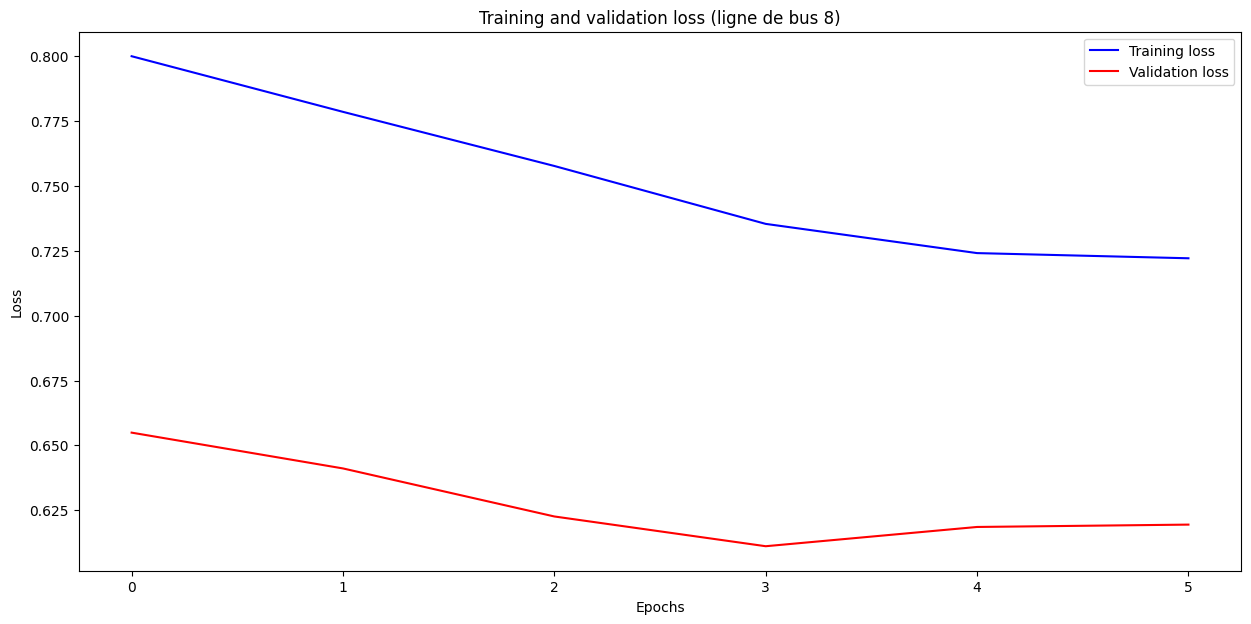

In [ ]:
plot_train_history(lstm_models['busline_8']['history'], title= f'Training and validation loss (ligne de bus 8)')

In [ ]:
X, y =lstm_models['busline_8']['data'][0], lstm_models['busline_8']['data'][1]
plot_prediction(lstm_models['busline_8']['target_scaler'], X[0], y[0], lstm_models['busline_8']['model'].predict(X [0])[0])

In [ ]:
losses = []
for k, v in lstm_models.items() :
  losses.append( np.min(v['history'].history['mse']) )
np.array(losses).mean()

0.8947612960492412

In [ ]:
ts.index[-1]

Timestamp('2020-03-07 00:00:00')

**Machine Learning Algorithm : XGBoost**

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error


In [ ]:
def fit_transformers(X, target_col, num_cols, cat_cols, target_scaler, num_cols_scaler, ohe):
    target_scaler = target_scaler.fit(X[target_col]) 
    num_cols_scaler = num_cols_scaler.fit(X[num_cols]) 
    ohe = ohe.fit(X[cat_cols]) 
    return target_scaler, num_cols_scaler, ohe
  
def transform_data(X, target_col, num_cols, cat_cols, target_scaler, num_cols_scaler, ohe, to_train=True) : 
  if to_train :
    tmp1 = pd.DataFrame(data=target_scaler.transform(X[target_col]), columns=target_scaler.get_feature_names_out(), index=X.index) # scale target variable and put in dataframe
  tmp2 = pd.DataFrame(data=num_cols_scaler.transform(X[num_cols]), columns=num_cols_scaler.get_feature_names_out(), index=X.index) # scale numeric variables and put in dataframe
  tmp3 = pd.DataFrame(data=ohe.transform(X[cat_cols]).toarray(), columns=ohe.get_feature_names_out(), index=X.index) # scale feature variables and put in dataframe
  return pd.concat([tmp1, tmp2, tmp3], axis=1) if to_train else  pd.concat([tmp2, tmp3], axis=1)

target_scaler = StandardScaler()
num_cols_scaler = StandardScaler()
ohe = OneHotEncoder(drop='if_binary')


In [ ]:
N_SPLITS = 2
tss = TimeSeriesSplit(n_splits=N_SPLITS, test_size=7*4, gap=1) # 7 jours * 4 semaines

fig, axs = plt.subplots(N_SPLITS, 1, figsize=(15, 8), sharex=True)

line5 = ts[ts.line == "5"]

fold = 0
for train_idx, val_idx in tss.split(line5):
    train = line5.iloc[train_idx]
    test = line5.iloc[val_idx]
    train['passengersNumber'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold+1}')
    test['passengersNumber'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [ ]:
target_scaler, num_cols_scaler, ohe = fit_transformers(line5, ['passengersNumber'], ["prev_week_passengers"], ['dayofweek', "dayofmonth", "is_we"], target_scaler, num_cols_scaler, ohe)

# Création d'un modèle XGBoost
xgb_model = XGBRegressor(base_score=0.5, booster='gbtree', objective='reg:linear')

# Définition de la grille de recherche
params_grid = {
    'learning_rate': [0.1],
    'max_depth': [4],
    'n_estimators': [200], 
    'reg_alpha': [0.1, 0.5, 1],
    'reg_lambda': [0.1, 0.5, 1]
}
grid_search = GridSearchCV(estimator=xgb_model, param_grid=params_grid, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

fold = 0
preds = []
scores = []
models = []
for train_idx, val_idx in tss.split(line5):
  train = line5.iloc[train_idx]
  val = line5.iloc[val_idx]

  X_train = transform_data(train, ['passengersNumber'], ["prev_week_passengers"], ['dayofweek', "dayofmonth", "is_we"], target_scaler, num_cols_scaler, ohe)
  X_val = transform_data(val, ['passengersNumber'], ["prev_week_passengers"], ['dayofweek', "dayofmonth", "is_we"], target_scaler, num_cols_scaler, ohe)
  print(X_train.shape, )
  # Entraînement de l'objet GridSearchCV
  grid_result = grid_search.fit(X_train.drop(columns=['passengersNumber']), X_train['passengersNumber'])

  y_pred = grid_search.best_estimator_.predict(X_val.drop(columns=['passengersNumber']))
  preds.append(y_pred)
  score = np.sqrt(mean_squared_error(X_val['passengersNumber'], y_pred))
  scores.append(score)
  models.append(grid_search.best_estimator_)

(260, 41)
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[14:09:59] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
(288, 41)
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[14:10:04] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print(f'Score across folds {np.mean(scores):0.4f}')
print(f'Fold scores:{scores}')

Score across folds 0.7591
Fold scores:[1.0096472909450616, 0.5084962590253633]


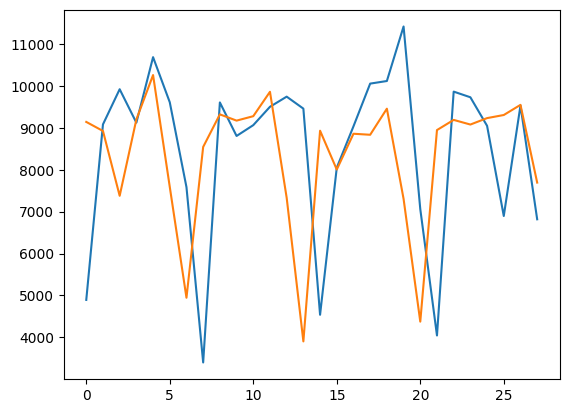

In [ ]:
l = len(X_val['passengersNumber'])
plt.plot(range(l), target_scaler.inverse_transform( [X_val['passengersNumber']] )[0])
plt.plot(range(l), target_scaler.inverse_transform( [preds[0]] )[0])
plt.show()

DatetimeIndex(['2020-03-07', '2020-03-08', '2020-03-09'], dtype='datetime64[ns]', name='dateTime', freq=None)


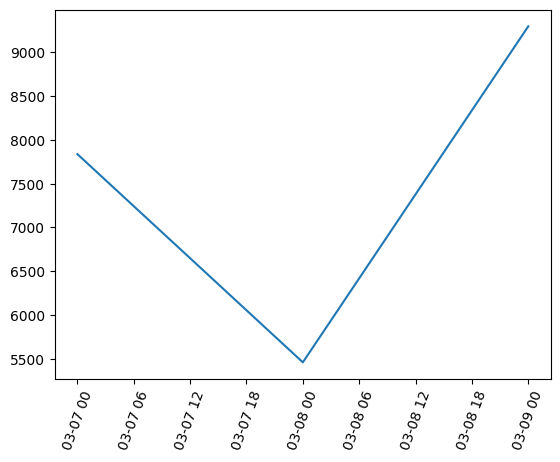

In [ ]:
def create_dataframe(data, line='5', nb_of_days = 3) :
  end_date = data.dateTime.max() + timedelta(days=nb_of_days)

  date_range = pd.date_range(start=data.dateTime.max(), end=end_date, inclusive='left')

  p = pd.DataFrame(data=date_range, columns=['dateTime'], index=date_range)
  p.set_index(keys=['dateTime'], drop=False, inplace=True)
  p = p.assign(dayofweek = p.index.day_name())
  p = p.assign(month = p.index.month_name())
  p = p.assign(dayofmonth = p.index.day)
  p = p.assign(is_we = p.index.dayofweek.isin(['Sunday', 'Saturday']))

  prev_week_passengers = [] 
  for date in p.dateTime :
    tmp = (date - pd.offsets.Day(7)) .strftime("%Y-%m-%d")
    tmp = data.loc[tmp]
    prev_week_passengers.append(tmp[tmp.line==line].passengersNumber.values[0])
  return p.assign(prev_week_passengers = prev_week_passengers)

def make_predictions(model, data):
  X = transform_data(data, ['passengersNumber'], ["prev_week_passengers"], ['dayofweek', "dayofmonth", "is_we"], target_scaler, num_cols_scaler, ohe, to_train=False)
  preds = model.predict(X) 
  l = len(preds)
  print(data.index)
  plt.plot(data.index, target_scaler.inverse_transform( [preds] )[0])
  plt.xticks(rotation=70, label="3 next days")
  plt.yticks(label="# of passengers estimated")
  plt.show()

make_predictions(models[0], create_dataframe(ts, line='5', nb_of_days = 3) )

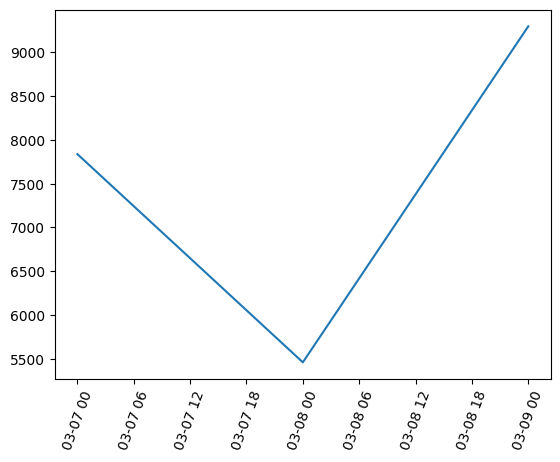

In [ ]:
make_predictions(models[0], create_dataframe(ts, line='5', nb_of_days = 3) )

In [ ]:
pd.date_range(start=ts.index.min(), end=ts.index.max())

DatetimeIndex(['2019-04-05', '2019-04-06', '2019-04-07', '2019-04-08',
               '2019-04-09', '2019-04-10', '2019-04-11', '2019-04-12',
               '2019-04-13', '2019-04-14',
               ...
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07'],
              dtype='datetime64[ns]', length=338, freq='D')

In [ ]:
def previous_week__lambda(x):
  prev_week_date = (x.dateTime - pd.offsets.Day(7)).date().strftime("%Y-%m-%d")
  if ts.dateTime.isin([prev_week_date]).any() :
    tmp = ts.reset_index(drop=True)
    tmp = tmp[tmp.dateTime == prev_week_date] 
    return tmp[tmp.line == x.line].passengersNumber.values if tmp[tmp.line == x.line].passengersNumber.values is not None else np.nan
  return np.nan

ts = ts.assign(prev_week_passengers = ts.apply(previous_week__lambda, axis=1).str[0] )

In [ ]:
df1.merge(df2, on="datetime", how=["inner", "left", "right"])

In [ ]:
dbus 

entreprise : dbus 
analyse pca pour regrouper les lignes de bus 
avoir des infos sur les bus : ligne principale ? ligne secondaire ? le nombre de place ? is_positive_event ?
série temporelle multivariée ou univariée ?
existe-t-il des lignes de bus qui ne roulent pas certains jours dans la semaine ? (comme le 46 de bidart)

écrire du code d'excellente qualité (orientée objet) afin d'utiliser la solution comme facebook prophet

déployer la solution avec docker 

Source : https://www.relataly.com/stock-price-prediction-multi-output-regression-using-neural-networks-in-python/5800/


Multi-output time series regression can forecast several steps of a time series at once. The number of neurons in the final output layer determines how many steps the model can predict. Models with one output return single-step forecasts.

In [ ]:
# https://www.kaggle.com/code/nicapotato/keras-timeseries-multi-step-multi-output => notebook kaggle about multi step, multi input and output

In [ ]:
# https://github.com/bnsreenu/python_for_microscopists/blob/master/213-ensemble_sign_language.py
# https://youtu.be/-ix_Mjzu8BU
"""
Author: Dr. Sreenivas Bhattiprolu
Ensemble of networks for improved accuracy in deep learning
Dataset: https://www.kaggle.com/datamunge/sign-language-mnist
"""

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

#Define epochs for all models.
epochs = 10

train = pd.read_csv('data/sign_mnist_train.csv')
test = pd.read_csv('data/sign_mnist_test.csv')

#Datasets as numpy arrays
train_data = np.array(train, dtype = 'float32')
test_data = np.array(test, dtype='float32')

#Define class labels for easy interpretation
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

#Sanity check - plot a few images and labels
i = random.randint(1,train.shape[0])
fig1, ax1 = plt.subplots(figsize=(2,2))
plt.imshow(train_data[i,1:].reshape((28,28))) 
print("Label for the image is: ", class_names[int(train_data[i,0])])


# Data distribution visualization
fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(221)
train['label'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Label')

#Dataset seems to be fairly balanced.

#Normalize / scale X values
X_train = train_data[:, 1:] /255.
X_test = test_data[:, 1:] /255.

#Convert y to categorical if planning on using categorical cross entropy
#No need to do this if using sparse categorical cross entropy
y_train = train_data[:, 0]
y_train_cat = to_categorical(y_train, num_classes=25)

y_test = test_data[:,0]
y_test_cat = to_categorical(y_test, num_classes=25)

#Reshape for the neural network
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

#########################################################
#Model 1

#Defining the Convolutional Neural Network
model1 = Sequential()

model1.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Dropout(0.2))

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Dropout(0.2))

model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Dropout(0.2))

model1.add(Flatten())

model1.add(Dense(128, activation = 'relu'))
model1.add(Dense(25, activation = 'softmax'))


#If your targets are one-hot encoded, use categorical_crossentropy. Examples of one-hot encodings:
# If your targets are integers, use sparse_categorical_crossentropy. 

#model1.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics =['acc'])
model1.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
model1.summary()

#Training the CNN model1
#history = model1.fit(X_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test))
history1 = model1.fit(X_train, y_train_cat, batch_size = 128, epochs = epochs, verbose = 1, validation_data = (X_test, y_test_cat))

model1.save('saved_models/model1.hdf5')

##########################################################
#Model2

model2 = Sequential()

model2.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(Conv2D(25, (1,1)))

model2.add(Flatten())

model2.add(Dense(25, activation = 'softmax'))

model2.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
model2.summary()

history2 = model2.fit(X_train, y_train_cat, batch_size = 128, epochs = epochs, verbose = 1, validation_data = (X_test, y_test_cat))

model2.save('saved_models/model2.hdf5')

###################################################################
#Model 3
#
model3 = Sequential()

model3.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.2))

model3.add(Flatten())

model3.add(Dense(25, activation = 'softmax'))

#If your targets are one-hot encoded, use categorical_crossentropy. Examples of one-hot encodings:
# If your targets are integers, use sparse_categorical_crossentropy. 

#model1.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics =['acc'])
model3.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
model3.summary()

#Training the CNN model1
#history = model1.fit(X_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test))
history3 = model3.fit(X_train, y_train_cat, batch_size = 128, epochs = epochs, verbose = 1, validation_data = (X_test, y_test_cat))

model3.save('saved_models/model3.hdf5')

#########################################################################
### Model average / sum Ensemble
# Simple sum of all outputs / predictions and argmax across all classes
########
from keras.models import load_model
from sklearn.metrics import accuracy_score

model1 = load_model('saved_models/model1.hdf5')
model2 = load_model('saved_models/model2.hdf5')
model3 = load_model('saved_models/model3.hdf5')

models = [model1, model2, model3]

preds = [model.predict(X_test) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

# argmax across classes
ensemble_prediction = np.argmax(summed, axis=1)

prediction1 = model1.predict_classes(X_test)
prediction2 = model2.predict_classes(X_test)
prediction3 = model3.predict_classes(X_test)

accuracy1 = accuracy_score(y_test, prediction1)
accuracy2 = accuracy_score(y_test, prediction2)
accuracy3 = accuracy_score(y_test, prediction3)
ensemble_accuracy = accuracy_score(y_test, ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

########################################
#Weighted average ensemble
models = [model1, model2, model3]
preds = [model.predict(X_test) for model in models]
preds=np.array(preds)
weights = [0.4, 0.2, 0.4]

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(y_test, weighted_ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)

########################################
#Grid search for the best combination of w1, w2, w3 that gives maximum acuracy
models = [model1, model2, model3]
preds1 = [model.predict(X_test) for model in models]
preds1=np.array(preds1)

import pandas as pd
df = pd.DataFrame([])

for w1 in range(0, 5):
    for w2 in range(0,5):
        for w3 in range(0,5):
            wts = [w1/10.,w2/10.,w3/10.]
            wted_preds1 = np.tensordot(preds1, wts, axes=((0),(0)))
            wted_ensemble_pred = np.argmax(wted_preds1, axis=1)
            weighted_accuracy = accuracy_score(y_test, wted_ensemble_pred)
            df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1], 
                                         'wt3':wts[2], 'acc':weighted_accuracy*100}, index=[0]), ignore_index=True)
            
max_acc_row = df.iloc[df['acc'].idxmax()]
print("Max accuracy of ", max_acc_row[0], " obained with w1=", max_acc_row[1],
      " w2=", max_acc_row[2], " and w3=", max_acc_row[3])         




###########################################################################
### Explore metrics for the ideal weighted ensemble model. 

models = [model1, model2, model3]
preds = [model.predict(X_test) for model in models]
preds=np.array(preds)
ideal_weights = [0.4, 0.1, 0.2] 

#Use tensordot to sum the products of all elements over specified axes.
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(y_test, ideal_weighted_ensemble_prediction)



i = random.randint(1,len(ideal_weighted_ensemble_prediction))
plt.imshow(X_test[i,:,:,0]) 
print("Predicted Label: ", class_names[int(ideal_weighted_ensemble_prediction[i])])
print("True Label: ", class_names[int(y_test[i])])

from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(y_test, ideal_weighted_ensemble_prediction)

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)


#PLot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
fig, ax = plt.subplots(figsize=(12,12))
plt.bar(np.arange(24), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(24), class_names) 